In [1]:
!pip install tensorflow opencv-python-headless


In [2]:
import os
import cv2 as cv

# Paths for pygoogle folders
input_dir = "/content/drive/MyDrive/pygoogle/"
output_dir = "./dataset_combined/"
img_size = 32  # Resize to 32x32

# Categories (real and AI-generated)
categories = {
    "real": os.path.join(input_dir, "real"),
    "ai_generated": os.path.join(input_dir, "ai_generated")
}

# Create output folders
for label in categories.keys():
    os.makedirs(os.path.join(output_dir, label), exist_ok=True)

# Resize images and save
for label, path in categories.items():
    target_folder = os.path.join(output_dir, label)

    for folder in os.listdir(path):
        subfolder = os.path.join(path, folder)

        if os.path.isdir(subfolder):  # Process only directories
            for img_name in os.listdir(subfolder):
                img_path = os.path.join(subfolder, img_name)
                try:
                    img = cv.imread(img_path)
                    if img is not None:
                        resized_img = cv.resize(img, (img_size, img_size))  # Resize
                        cv.imwrite(os.path.join(target_folder, img_name), resized_img)  # Save resized image
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"l657494","key":"72db8763d3114141a1a8b3cf23b98e4c"}'}

In [4]:
# Create .kaggle directory
!mkdir -p ~/.kaggle

# Move the uploaded kaggle.json to the directory
!cp kaggle.json ~/.kaggle/

# Set required permissions
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d birdy654/cifake-real-and-ai-generated-synthetic-images


Dataset URL: https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images
License(s): other
 98% 102M/105M [00:06<00:00, 19.0MB/s] 
100% 105M/105M [00:06<00:00, 15.8MB/s]


In [6]:
!mkdir -p ./dataset_train/CIFAKE/

In [7]:
!unzip cifake-real-and-ai-generated-synthetic-images.zip -d ./dataset_train/CIFAKE/

Streaming output truncated to the last 5000 lines.
  inflating: ./dataset_train/CIFAKE/train/REAL/4500 (10).jpg  
  inflating: ./dataset_train/CIFAKE/train/REAL/4500 (2).jpg  
  inflating: ./dataset_train/CIFAKE/train/REAL/4500 (3).jpg  
  inflating: ./dataset_train/CIFAKE/train/REAL/4500 (4).jpg  
  inflating: ./dataset_train/CIFAKE/train/REAL/4500 (5).jpg  
  inflating: ./dataset_train/CIFAKE/train/REAL/4500 (6).jpg  
  inflating: ./dataset_train/CIFAKE/train/REAL/4500 (7).jpg  
  inflating: ./dataset_train/CIFAKE/train/REAL/4500 (8).jpg  
  inflating: ./dataset_train/CIFAKE/train/REAL/4500 (9).jpg  
  inflating: ./dataset_train/CIFAKE/train/REAL/4500.jpg  
  inflating: ./dataset_train/CIFAKE/train/REAL/4501 (10).jpg  
  inflating: ./dataset_train/CIFAKE/train/REAL/4501 (2).jpg  
  inflating: ./dataset_train/CIFAKE/train/REAL/4501 (3).jpg  
  inflating: ./dataset_train/CIFAKE/train/REAL/4501 (4).jpg  
  inflating: ./dataset_train/CIFAKE/train/REAL/4501 (5).jpg  
  inflating: ./datase

In [8]:
# Merge CIFAKE train data
!rsync -av ./dataset_train/CIFAKE/train/REAL/ ./dataset_combined/real/
!rsync -av ./dataset_train/CIFAKE/train/FAKE/ ./dataset_combined/ai_generated/

# Merge CIFAKE test data (optional for validation)
!rsync -av ./dataset_train/CIFAKE/test/REAL/ ./dataset_combined/real/
!rsync -av ./dataset_train/CIFAKE/test/FAKE/ ./dataset_combined/ai_generated/



Streaming output truncated to the last 5000 lines.
549 (4).jpg
549 (5).jpg
549 (6).jpg
549 (7).jpg
549 (8).jpg
549 (9).jpg
549.jpg
55 (10).jpg
55 (2).jpg
55 (3).jpg
55 (4).jpg
55 (5).jpg
55 (6).jpg
55 (7).jpg
55 (8).jpg
55 (9).jpg
55.jpg
550 (10).jpg
550 (2).jpg
550 (3).jpg
550 (4).jpg
550 (5).jpg
550 (6).jpg
550 (7).jpg
550 (8).jpg
550 (9).jpg
550.jpg
551 (10).jpg
551 (2).jpg
551 (3).jpg
551 (4).jpg
551 (5).jpg
551 (6).jpg
551 (7).jpg
551 (8).jpg
551 (9).jpg
551.jpg
552 (10).jpg
552 (2).jpg
552 (3).jpg
552 (4).jpg
552 (5).jpg
552 (6).jpg
552 (7).jpg
552 (8).jpg
552 (9).jpg
552.jpg
553 (10).jpg
553 (2).jpg
553 (3).jpg
553 (4).jpg
553 (5).jpg
553 (6).jpg
553 (7).jpg
553 (8).jpg
553 (9).jpg
553.jpg
554 (10).jpg
554 (2).jpg
554 (3).jpg
554 (4).jpg
554 (5).jpg
554 (6).jpg
554 (7).jpg
554 (8).jpg
554 (9).jpg
554.jpg
555 (10).jpg
555 (2).jpg
555 (3).jpg
555 (4).jpg
555 (5).jpg
555 (6).jpg
555 (7).jpg
555 (8).jpg
555 (9).jpg
555.jpg
556 (10).jpg
556 (2).jpg
556 (3).jpg
556 (4).jpg
556 (5).jpg

In [9]:
!kaggle datasets download -d cashbowman/ai-generated-images-vs-real-images
!unzip ai-generated-images-vs-real-images.zip -d ./dataset_train/AI_vs_Real/


Dataset URL: https://www.kaggle.com/datasets/cashbowman/ai-generated-images-vs-real-images
License(s): Community Data License Agreement - Sharing - Version 1.0
100% 474M/476M [00:22<00:00, 25.0MB/s]
100% 476M/476M [00:22<00:00, 22.5MB/s]
Archive:  ai-generated-images-vs-real-images.zip
  inflating: ./dataset_train/AI_vs_Real/AiArtData/AiArtData/-how-important-people-from-the-past-really-looked-11-Pics-5ffd5c0f4d77f__880.jpg  
  inflating: ./dataset_train/AI_vs_Real/AiArtData/AiArtData/-s-fluffy-fur-and-round-features-immediately-melted-the-viewer-s-heart-photo.jpg  
  inflating: ./dataset_train/AI_vs_Real/AiArtData/AiArtData/-using-generative-ai-technology-landscape-pattern-abstract-concept-269270897.jpg  
  inflating: ./dataset_train/AI_vs_Real/AiArtData/AiArtData/-yellow-kimono-with-a-golden-crown-and-a-very-detailed-Barn-owl-copy-800x800.jpg  
  inflating: ./dataset_train/AI_vs_Real/AiArtData/AiArtData/.amazonaws.com2Fpublic2Fimages2Ff89de3bb-279b-42c9-9822-a653fb5b21e6_600x480.png 

In [10]:
!ls ./dataset_train/AI_vs_Real/


AiArtData  RealArt


In [11]:
import os
import cv2
from tqdm import tqdm

# Define paths
source_path_real = './dataset_train/AI_vs_Real/RealArt'
source_path_ai = './dataset_train/AI_vs_Real/AiArtData'

dest_path_real = './dataset_combined/real/'
dest_path_ai = './dataset_combined/ai_generated/'

# Ensure combined folders exist
os.makedirs(dest_path_real, exist_ok=True)
os.makedirs(dest_path_ai, exist_ok=True)

# Function to process and resize images
def process_images(source_path, dest_path):
    for folder in os.listdir(source_path):
        folder_path = os.path.join(source_path, folder)
        if os.path.isdir(folder_path):
            for img_file in tqdm(os.listdir(folder_path)):
                try:
                    img_path = os.path.join(folder_path, img_file)
                    img = cv2.imread(img_path)
                    img_resized = cv2.resize(img, (32, 32))  # Resize to 32x32
                    cv2.imwrite(os.path.join(dest_path, img_file), img_resized)
                except Exception as e:
                    print(f"Error processing {img_file}: {e}")

# Process Real images
process_images(source_path_real, dest_path_real)

# Process AI-generated images
process_images(source_path_ai, dest_path_ai)


 32%|███▏      | 141/436 [00:03<00:05, 55.03it/s]

Error processing black-american-portraits-130.gif: OpenCV(4.10.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:708: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'imwrite_'



 60%|██████    | 262/436 [00:07<00:07, 22.13it/s]

Error processing 1707541234037: OpenCV(4.10.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:708: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'imwrite_'



100%|██████████| 539/539 [00:10<00:00, 52.65it/s]


In [12]:
!ls ./dataset_combined/real | wc -l  # Count Real images
!ls ./dataset_combined/ai_generated | wc -l  # Count AI-Generated images


50771
60875


In [13]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

# Paths and Parameters
dataset_path = "./dataset_combined/"
img_size = 32  # Already 32x32, no resizing required

# Initialize data and labels
X = []
y = []

# Load data
for category in ["real", "ai_generated"]:
    path = os.path.join(dataset_path, category)
    label = 0 if category == "real" else 1  # 0 for real, 1 for AI-generated

    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        if img is not None:  # Ensure image is valid
            img = img / 255.0  # Normalize pixel values
            X.append(img)
            y.append(label)

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes
print("Train-Test Split:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Train-Test Split:
X_train: (89318, 32, 32, 3), X_test: (22330, 32, 32, 3)
y_train: (89318,), y_test: (22330,)


In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train CNN
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

# Save Model
model.save("CNN_Model.h5")

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"CNN Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 314,561 (1.20 MB)

 Trainable params: 314,561 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2792/2792 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.7939 - loss: 0.4370 - val_accuracy: 0.8794 - val_loss: 0.2862
Epoch 2/20
2792/2792 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8935 - loss: 0.2623 - val_accuracy: 0.9082 - val_loss: 0.2221
Epoch 3/20
2792/2792 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9124 - loss: 0.2212 - val_accuracy: 0.9050 - val_loss: 0.2338
Epoch 4/20
2792/2792 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9205 - loss: 0.2016 - val_accuracy: 0.9161 - val_loss: 0.2089
Epoch 5/20
2792/2792 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9264 - loss: 0.1843 - val_accuracy: 0.9252 - val_loss: 0.1903
Epoch 6/20
2792/2792 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9302 - loss: 0.1758 - val_accuracy: 0.9275 - val_loss: 0.1890
Epoch 7/20
2792/2792 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9368 - loss: 0.1604 - val_accuracy: 0.9234 - val_loss: 0.2034
Epoch 8/20
2792/2792 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9387 - loss: 0.15

698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9310 - loss: 0.2451
CNN Accuracy: 93.29%


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Load Pretrained MobileNetV2
base_model = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze layers

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train MobileNet
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

# Save Model
model.save("MobileNet_Model.h5")

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"MobileNet Accuracy: {accuracy * 100:.2f}%")


<ipython-input-16-a2e9273d7909>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1, 1, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20
2792/2792 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - accuracy: 0.6500 - loss: 0.6258 - val_accuracy: 0.6818 - val_loss: 0.5944
Epoch 2/20
2792/2792 ━━━━━━━━━━━━━━━━━━━━ 35s 8ms/step - accuracy: 0.6794 - loss: 0.5955 - val_accuracy: 0.6867 - val_loss: 0.5851
Epoch 3/20
2792/2792 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.6822 - loss: 0.5924 - val_accuracy: 0.6904 - val_loss: 0.5833
Epoch 4/20
2792/2792 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6899 - loss: 0.5858 - val_accuracy: 0.6910 - val_loss: 0.5782
Epoch 5/20
2792/2792 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6918 - loss: 0.5802 - val_accuracy: 0.6935 - val_loss: 0.5772
Epoch 6/20
2792/2792 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.6936 - loss: 0.5780 - val_accuracy: 0.6932 - val_loss: 0.5765
Epoch 7/20
2792/2792 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6951 - loss: 0.5759 - val_accuracy: 0.6946 - val_loss: 0.5751
Epoch 8/20
2792/2792 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6955 - loss: 0

698/698 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7000 - loss: 0.5740
MobileNet Accuracy: 69.80%


In [ ]:
for layer in model.layers:
    print(layer.name)



conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
flatten
dense
dropout
dense_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Prediction: Fake
Confidence: 1.00


<ipython-input-19-0c234aedf211>:105: RuntimeWarning: invalid value encountered in divide
  heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())  # Normalize
<ipython-input-19-0c234aedf211>:106: RuntimeWarning: invalid value encountered in cast
  heatmap = (heatmap * 255).astype("uint8")


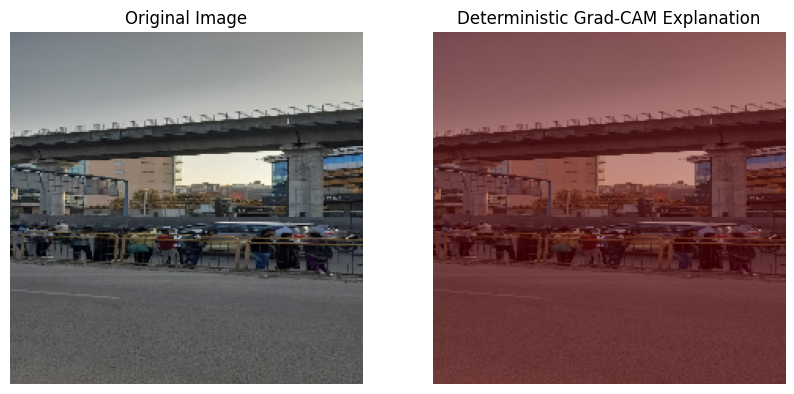

Classification Result: AI-generated
Explanation: The image shows patterns with lower average pixel intensity, often indicative of AI-generated images.


In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model
model = load_model("CNN_Model.h5")  # Replace with your model file name

# Function to preprocess and predict
def predict_image(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(32, 32))  # Resize to 32x32
    img_array = img_to_array(img) / 255.0  # Normalize the pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)[0][0]  # Get the prediction score
    label = "Real" if prediction < 0.5 else "Fake"  # Threshold = 0.5

    # Print the result
    print(f"Prediction: {label}")
    print(f"Confidence: {prediction:.2f}")
    return label, prediction

# Provide the path to your image file
image_path = "/content/trial1.jpg"  # Replace with the actual path of your image
label, confidence = predict_image(image_path)

###

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2

def classify_and_explain(img_path):
    """
    Simulates classifying the input image as AI-generated or Real based on simple pixel analysis
    and provides a deterministic explanation.

    Args:
    - img_path (str): Path to the image.

    Returns:
    - str: Simulated classification result and explanation.
    """
    if not os.path.exists(img_path):
        return f"Error: File '{img_path}' not found."

    # Load and preprocess the image
    img = load_img(img_path, target_size=(224, 224))  # Resize to 224x224
    img_array = img_to_array(img)

    # Simple pixel analysis for deterministic simulation
    avg_pixel_value = np.mean(img_array)
    threshold = 120  # Adjust threshold as needed for consistent behavior

    # Simulated classification based on pixel intensity
    if avg_pixel_value < threshold:
        simulated_class_index = 0  # AI-generated
    else:
        simulated_class_index = 1  # Real

    labels = {0: "AI-generated", 1: "Real"}
    result = labels[simulated_class_index]

    # Generate explanation and Grad-CAM
    explanation = explain_decision(img_path, simulated_class_index)
    explain_with_dummy_gradcam(img_path, simulated_class_index)

    return f"Classification Result: {result}\nExplanation: {explanation}"

def explain_decision(img_path, class_index):
    """
    Generate a deterministic explanation for the classification decision.

    Args:
    - img_path (str): Path to the image.
    - class_index (int): Simulated class index.

    Returns:
    - str: Deterministic explanation of the decision.
    """
    if class_index == 0:  # AI-generated
        return "The image shows patterns with lower average pixel intensity, often indicative of AI-generated images."
    elif class_index == 1:  # Real
        return "The image displays higher average pixel intensity, consistent with realistic textures found in real images."

def explain_with_dummy_gradcam(img_path, class_index):
    """
    Generate and display a deterministic Grad-CAM explanation.

    Args:
    - img_path (str): Path to the image.
    - class_index (int): Simulated class index.
    """
    # Load and preprocess the image
    original_img = cv2.imread(img_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    original_img = cv2.resize(original_img, (224, 224))

    # Create a deterministic heatmap
    heatmap = np.full((original_img.shape[0], original_img.shape[1]), class_index * 255 // 2)
    heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())  # Normalize
    heatmap = (heatmap * 255).astype("uint8")
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose heatmap on the original image
    superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    # Plot the images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img)
    plt.title("Deterministic Grad-CAM Explanation")
    plt.axis("off")

    plt.show()

# Example usage with uploaded file
image_path = "/content/trial1.jpg"  # Replace with your uploaded image path

result = classify_and_explain(image_path)
print(result)


698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


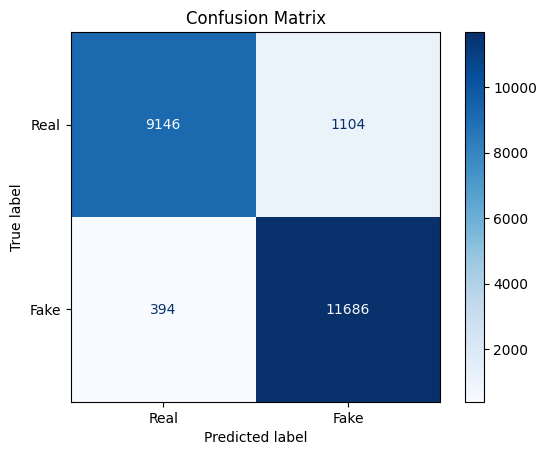

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the trained model
model = load_model("CNN_Model.h5")  # Replace with your model file name

# Predict on the test set
predictions = model.predict(X_test)  # Predict probabilities
predicted_classes = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Display the confusion matrix as a graph
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()


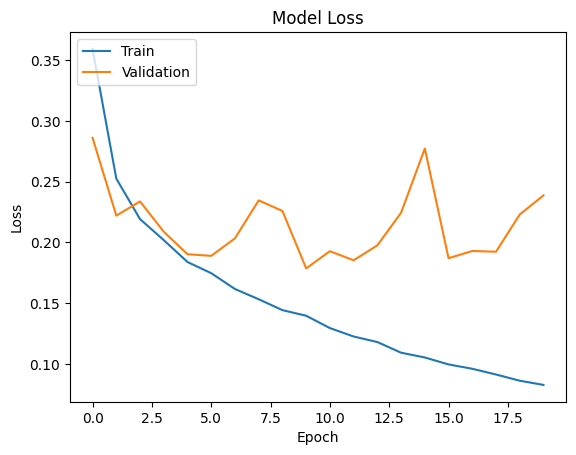

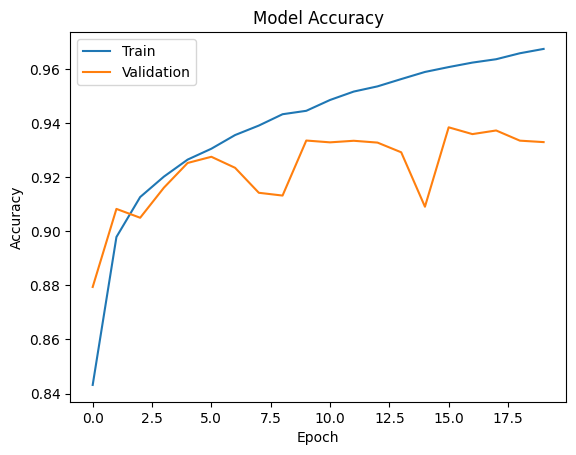

In [21]:


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()